<a href="https://colab.research.google.com/github/ejrtks1020/Pytorch-basic/blob/main/PyTorch_%EC%86%8C%ED%94%84%ED%8A%B8%EB%A7%A5%EC%8A%A4_MNIST_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

In [ ]:
USE_CUDA = torch.cuda.is_available() # GPU를 사용가능하면 True, 아니라면 False를 리턴
device = torch.device("cuda" if USE_CUDA else "cpu") # GPU 사용 가능하면 사용하고 아니면 CPU 사용
print("다음 기기로 학습합니다:", device)

다음 기기로 학습합니다: cuda


In [ ]:
# 랜덤 시드를 고정
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
  torch.cuda.manual_seed_all(777)

In [ ]:
#하이퍼 파라미터
training_epochs = 15
batch_size = 100

In [ ]:
#MNIST dataset
mnist_train = dsets.MNIST(root = 'MNIST_data/',
                          train = True,
                          transform = transforms.ToTensor(),
                          download = True)

mnist_test = dsets.MNIST(root = 'MNIST_data/',
                         train = False,
                         transform = transforms.ToTensor(),
                         download = True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [ ]:
# dataset loader
data_loader = DataLoader(dataset = mnist_train,
                         batch_size = batch_size,
                         shuffle = True,
                         drop_last = True)

* drop_last를 하는 이유 : 마지막 미니 배치의 크기가 배치 사이즈 보다 작을때, 이 미니 배치를 경사하강법에 사용할경우 마지막 배치가 상대적으로 과대 적합될수 있기때문


In [ ]:
# MNIST data image of shape 28 * 28 = 784
linear = nn.Linear(784, 10, bias = True).to(device)

to() 함수는 연산을 어디서 수행할지를 정한다. 즉, to()함수는 모델의 매개변수를 지정한 장치의 메모리로 보낸다.

GPU를 사용하려면 to('cuda')를 해줄 필요가 있다.

bias = True 기본값이며 편향 b를 사용할 것인지 나타낸다.

In [ ]:
# 비용함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss().to(device) #내부적으로 소프트맥스 함수를 포함하고 있음
optimizer = torch.optim.SGD(linear.parameters(), lr = 0.1)

In [ ]:
for epoch in range(training_epochs):
  avg_cost = 0
  total_batch = len(data_loader)

  for X, y in data_loader:
    # 배치 크기가 100이므로 아래의 연산에서는 X는 (100, 784)의 텐서가 된다.
    X = X.view(-1, 28 * 28).to(device)
    y = y.to(device)

    optimizer.zero_grad()
    hypothesis = linear(X)
    cost = criterion(hypothesis, y)
    cost.backward()
    optimizer.step()

    avg_cost += cost / total_batch
  
  print('Epoch {:4d}/{} cost = {:.6f}'.format(
      epoch+1, training_epochs, cost.item()
  ))


Epoch    1/15 cost = 0.447237
Epoch    2/15 cost = 0.316136
Epoch    3/15 cost = 0.293194
Epoch    4/15 cost = 0.487320
Epoch    5/15 cost = 0.304579
Epoch    6/15 cost = 0.463760
Epoch    7/15 cost = 0.271112
Epoch    8/15 cost = 0.245503
Epoch    9/15 cost = 0.283133
Epoch   10/15 cost = 0.266656
Epoch   11/15 cost = 0.387542
Epoch   12/15 cost = 0.297828
Epoch   13/15 cost = 0.211182
Epoch   14/15 cost = 0.247602
Epoch   15/15 cost = 0.410990


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


tensor([[  218.3573, -2471.1331,   346.5546,  ...,  2475.0408,   393.8407,
           791.0399],
        [ 1371.8993,  -277.0641,  2713.9353,  ..., -4234.6191,  1532.6021,
         -2211.7603],
        [-1382.6377,  1494.4269,   469.1544,  ...,   -66.9953,   583.4078,
          -306.6624],
        ...,
        [-1844.4459, -1886.7257,  -646.3840,  ...,   219.7032,  1380.8739,
          1161.1715],
        [ -452.9131,  -435.2810,  -480.9577,  ..., -1436.7582,  1700.6095,
          -690.3734],
        [ 1071.7957, -2663.1663,  1398.3937,  ..., -2211.9272,   457.8275,
          -946.5910]], device='cuda:0')
torch.Size([10000])
Accuracy: 0.8883000016212463
Label:  tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0, 

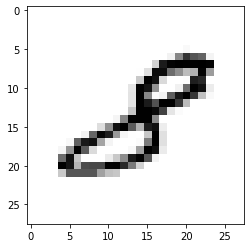

In [ ]:
# 테스트 데이터를 사용하여 모델을 테스트
with torch.no_grad(): # torch.no_grad()를 하면 gradient 계산을 수행하지 않는다.
  X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
  y_test = mnist_test.test_labels.to(device)

  pred = linear(X_test)
  print(pred)
  correct_pred = torch.argmax(pred, 1) == y_test
  print(correct_pred.shape)
  accuracy = correct_pred.float().mean()
  print('Accuracy:', accuracy.item())

  #MNIST 테스트 데이터에서 무작위로 하나를 뽑아서 예측
  r = random.randint(0, len(mnist_test) - 1)
  X_single_data = mnist_test.test_data[r].view(-1, 28 * 28).float().to(device)
  y_single_data = mnist_test.test_data[r].view(-1, 28 * 28).to(device)

  print('Label: ', y_single_data)
  single_prediction = linear(X_single_data)
  print('Prediction: ', torch.argmax(single_prediction, 1).item())

  plt.imshow(mnist_test.test_data[r].view(28,28), cmap = 'Greys', interpolation = 'nearest')
  plt.show()